# Data Mining (JADS) - Assignment 3
This assignment is all about evaluating models, to select the best models for a given dataset, or understand algorithm performance. We will use several new datasets in this assignment. To download them, go to https://www.openml.org and create an account. Use your actual name since this will be important for the final assignment. For now, we will only use OpenML for downloading datasets.

The same rules as the previous assignments regarding report length and formatting apply.

## Exercise 1: 10-fold cross-validation (1 point)
Evaluate the performance of the J48 decision tree induction algorithm on the Waveform dataset, using 10-fold cross-validation. More information on the dataset here: https://www.openml.org/d/60. Download with the download icon.

* To get the individual results of the 10-fold cross-validation. In the Weka Experimenter, click 'New', and then add the dataset under datasets and J48 under algorithms. Set 'Number of repetitions' to 1. Then click 'start' in the Run tab. When finished, go to Analyse, click 'Experiment'. Under Row, choose 'Fold', and under Cols, choose 'Area_Under_ROC'. Report the numbers that you see (or add a screenshot) and explain what they mean.
* Compute and report the mean and variance of these results.
* Explain what causes the variance in these results.

## Exercise 2: Statistical analysis of evaluation results (1 point)
Compare 2 classifiers (J48 and Naive Bayes) on 3 datasets: Waveform, Letter, and Soybean. Letter can be found here: https://www.openml.org/d/6, and Soybean here: https://www.openml.org/d/42.

* In the Weka Experimenter, click 'new' and select the 2 datasets and 2 algorithms above. Then run the experiments (they may take a few minutes). Then go to the 'Analyse' tab and click 'Experiment'.
* Do a statistical analysis of the performance results. Run a corrected paired T-test with significance level 5%, using the 'Area_under_ROC' measure. Click 'perform test'. Add a screenshot of the result.
* Interpret the results. Remember that 'v' means a (statistically significant) win and '\*' a (statistically significant) loss.
* Which algorithm is winning on which datasets? Which is the overall best?

## Exercise 3: ROC curves (2 points)
Given below is the real classification of 13 instances and the prediction made by classifiers A and B, and a probabilistic classifier C. Remember that a probability can be turned into a classification by providing a threshold (e.g. 0.5). C is considered to predict + if its prediction is above the threshold, - otherwise.

example| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |10 |11 |12 |13 
---|---|---|---|---|---|---|---|---|---|---|---|---|---
true label|+ | + | + | + | + | + | + | - | - | - | - | - | - 
prediction A  | + | + | - | - | + | + | - | - | + | - | - | - | - 
prediction B  | + | + | + | + | - | + | + | - | + | - | + | - | - 
prediction C  |0.8|0.9|0.7|0.6|0.4|0.8|0.4|0.4|0.6|0.4|0.4|0.4|0.2

Do the following:

- Plot A and B on a ROC diagram (using a program that can plot, e.g. Excel, or by hand). 
- For C, add a point for every threshold that makes a difference. This will yield a ROC curve for C.
- Draw the convex hull of the classifiers A, B, C. See the example figure below. Use all points for C that you computed above. Which classifiers are never optimal? Which classifiers are optimal in a certain environment?
- Finally, consider a situation where the cost of a false positive and false negative are $C_{FP}=1$ and $C_{FN}=5$. Draw the corresponding cost line in th ROC diagram. Which classifier is best considering these costs: A, B, or C with a threshold of 0.5?

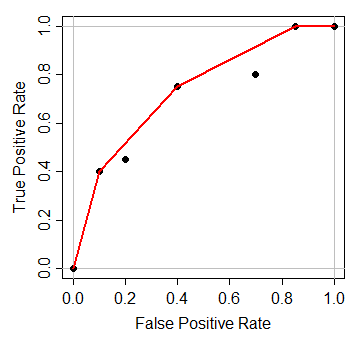

In [3]:
from IPython.display import display, Image
display(Image('./images/convex_hull.png', width=400))

## Exercise 4: Comparing Classifiers (1 point)
Plot the Precision-Recall curves of the J48 decision tree learner and Naive Bayes on dataset Spambase: https://www.openml.org/d/44.

* In the Explorer, train the algorithms. Then in 'Result list', right-click and choose 'Visualize Threshold curve', and then choose class '1' (the 'spam' class). Choose 'Precision' for the Y-axis, and 'Recall' for the X-axis. Put a screenshots of the resulting Precision-Recall curves in the report.
* Discuss the major differences between the two curves. Explain why they are different.
* Which is the best algorithm based on the Area under the Precision-Recall curve? You can find this for both algorithms in the list of results in the Classifier Tab, called 'PRC area'. Use the weighted average.
* In a situation where you want high recall (you catch almost all spam emails), which of the two algorithms would you choose? Which threshold value would you use (you can either select points or just look at the color of the points)?
* Can you simply choose the solution with maximum recall (Recall=1) and low precision? Why (not)? What would that mean for the problem of classifing spam emails?

## Exercise 5: Classification trees (2 points)
Consider the following dataset. It record several attempts at asking your friend out for a date. Inputs are various weather conditions, and the target is whether or not your friend agreed to go out. You want to learn a decision tree to predict whether your friend wants to go out at any given day (assuming that there are no other factors involved).

Example|Sky|AirTemp|Humidity|Wind|Water|Forecast|Date?
---|---|---|---|---|---|---|---
1|sunny|warm|normal|strong|warm|same|yes
2|sunny|warm|high|strong|warm|same|yes
3|rainy|cold|high|strong|warm|change|no
4|sunny|warm|high|strong|cool|change|yes
5|sunny|warm|normal|weak|warm|same|no

Learn a decision tree:

- Compute the class entropy for the entire dataset?
- What is the information gain when you split the data using the *Sky* feature? Show your calculation.
- Construct a tree by following a simple decision tree learner:
    - Select a feature to split on according to its information gain. Compute the information gain for all features, and choose the one with the highest information gain. If multiple features are equally good, select the leftmost one.
    - Split the data according to this feature. Write down the 2 new tables that you get.
    - For each of these, compute again the best split using information gain (or stop when every instance has the same class).
    - Repeat until the tree is complete (it should be quite small). Show the whole tree.

## Exercise 6: Manual model selection (2 points)
Try to find the optimal parameters of the J48 decision tree induction algorithm on the Waveform dataset, through reasoning about the observed performance.

You are asked to (manually) vary 2 of J48's hyperparameters:

- Minimal number of objects (M): The number of instances that need to be in a leaf before it can be split. Large values lead to smaller, simpler trees.
    - Reasonable values are between 2 and 128
- Confidence factor (C): The confidence threshold used for pruning the tree. It defines how much a tree is pruned after it is built. Small values will lead to more pruning, and thus smaller, simpler trees.
    - Reasonable values are between 0.001 and 1000 (log scale)

Answer the following questions.

- Start with the default settings: M=2 and C=0.25. Use the explorer to evaluate the model with 10-fold crossvalidation. What is the accuracy (Correctly Classified Instances)?
- Run it again with M=8 and M=64. What are the estimated performances?
- Considering the performance of M=2,8,64 and your understanding of what M does, for which value is the model likely underfitting? For which is overfitting?
- Given your interpretation from the previous question, which would be a good value of M to try next? Try it and report the performance? Did you find a better result?
- Return to M=2 and set C=0.01. What is the performance? What about C=1?
- Looking at the values tried (0.01, 0.25, 1.0), are there values that are likely overfitting or underfitting?
- Based on this, what would be a better C value to try? Try it and report the result. Is it better, or overfitting or underfitting more?
- Finally, train a model with the best values observed values for C and M. Is this model better? Explain why (or why not).

## Exercise 7: Random Search (1 point)
Finally, we will optimize these hyperparameters automatically. For this, we need to use the package manager to install the MultiSearch package. After installation (and restart), you should see the MultiSearch algorithm in Weka's classifier list (under 'meta').

- Set up a random search with as evaluation 'Accuracy' and classier 'J48'. You need to add 2 parameter ranges under 'searchParameters': C, varied from $10^{-3}$ to $10^{3}$, and M, varied from $2$ to $128$ ('Expression' should be set to 'I'). Add a screenshot of your settings.
- Run the random search. This may take a few minutes. What are the reported optimal values for C and M (search the output for 'Values')? What is the performance of the selected model? Is it better than the performance you found manually?